# Желтова А.А. ИУ5-63Б

## 7 Вариант

### Задание. 
Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

In [14]:
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")


In [15]:
data = pd.read_csv('Admission_Predict_Ver1.1.csv', sep=",")

In [16]:
data.shape

(500, 9)

In [17]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [18]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [19]:
# проверим есть ли пропущенные значения
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [20]:
# Определим уникальные значения для целевого признака
data['Research'].unique()

array([1, 0])

## Масштабирование данных:

In [21]:
from sklearn.preprocessing import MinMaxScaler

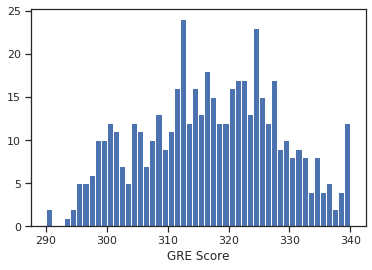

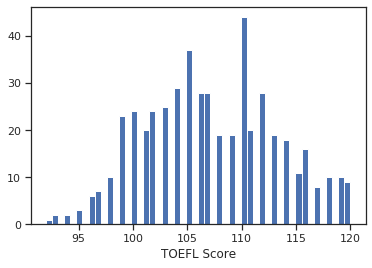

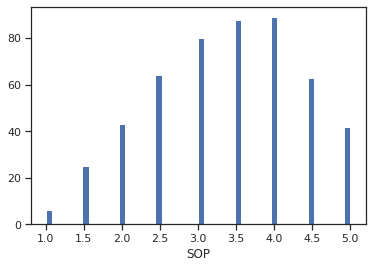

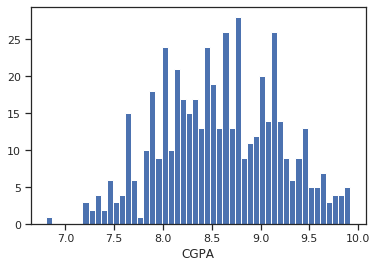

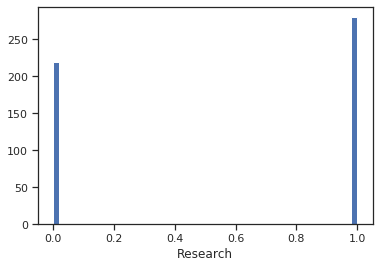

In [22]:
num_col = ['GRE Score', 'TOEFL Score', 'SOP', 'CGPA', 'Research']
for col in data[num_col]:
    plt.hist(data[col],50)
    plt.xlabel(col)
    plt.show()

In [23]:
# MinMax Масштабирование
sc1 = MinMaxScaler()
for item in num_col:
    data.loc[:,item] = sc1.fit_transform(data[[item]])

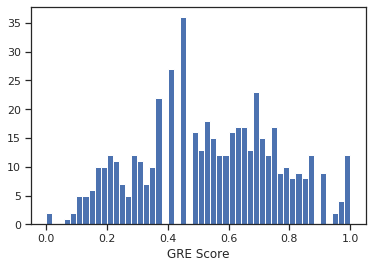

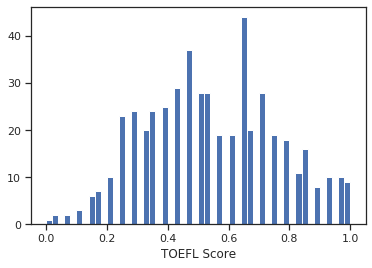

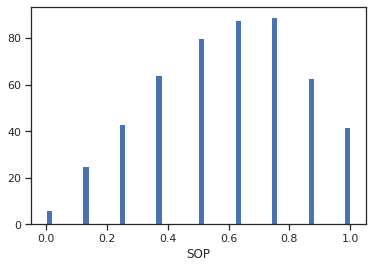

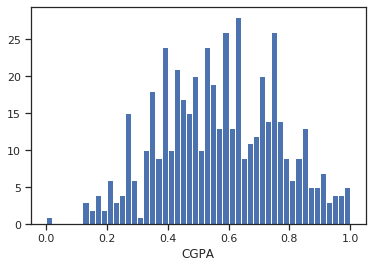

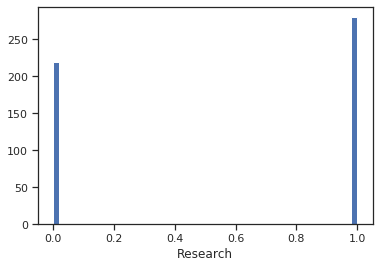

In [24]:
# Гистограмма по признакам, после масштабирования
for col in data[num_col]:
    plt.hist(data[col],50)
    plt.xlabel(col)
    plt.show()

## Кодирование категориальных признаков

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le = LabelEncoder()
data.loc[:, 'GRE Score'] = le.fit_transform(data['GRE Score'])
data['GRE Score'].head()

0    45
1    32
2    24
3    30
4    22
Name: GRE Score, dtype: int64

In [27]:
cat_cols = ['TOEFL Score', 'SOP', 'CGPA']
one_hot = pd.get_dummies(data[cat_cols].astype(str))
one_hot.head()

,TOEFL Score_0.0,TOEFL Score_0.03571428571428559,TOEFL Score_0.07142857142857117,TOEFL Score_0.1071428571428572,TOEFL Score_0.1428571428571428,TOEFL Score_0.17857142857142838,TOEFL Score_0.2142857142857144,TOEFL Score_0.25,TOEFL Score_0.2857142857142856,TOEFL Score_0.3214285714285712,...,CGPA_0.9294871794871793,CGPA_0.9423076923076925,CGPA_0.9487179487179485,CGPA_0.9551282051282048,CGPA_0.9615384615384617,CGPA_0.9679487179487181,CGPA_0.9807692307692304,CGPA_0.9839743589743586,CGPA_0.9967948717948718,CGPA_1.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Замена бинарными значениями
data = data.join(one_hot)
data.drop(columns=cat_cols, inplace=True)

In [29]:
data.head()

,Serial No.,GRE Score,University Rating,LOR,Research,Chance of Admit,TOEFL Score_0.0,TOEFL Score_0.03571428571428559,TOEFL Score_0.07142857142857117,TOEFL Score_0.1071428571428572,...,CGPA_0.9294871794871793,CGPA_0.9423076923076925,CGPA_0.9487179487179485,CGPA_0.9551282051282048,CGPA_0.9615384615384617,CGPA_0.9679487179487181,CGPA_0.9807692307692304,CGPA_0.9839743589743586,CGPA_0.9967948717948718,CGPA_1.0
0,1,45,4,4.5,1.0,0.92,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,32,4,4.5,1.0,0.76,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,24,3,3.5,1.0,0.72,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,30,3,2.5,1.0,0.80,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,22,2,3.0,0.0,0.65,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Модели

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
data_train, data_test, data_y_train, data_y_test = train_test_split(data[data.columns.drop('Serial No.')], data['Serial No.'], random_state=1)

### Дерево решений

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
dtc = DecisionTreeRegressor(random_state=1).fit(data_train, data_y_train)
data_test_predicted_dtc = dtc.predict(data_test)

### Случайный лес

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RF = RandomForestRegressor(random_state=1).fit(data_train, data_y_train)
data_test_predicted_rf = RF.predict(data_test)

## Оценка качества:

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
# Mean squared error - средняя квадратичная ошибка
print('Метрика MSE:\nДерево решений: {}\nСлучайный лес: {}'.format(mean_squared_error(data_y_test, data_test_predicted_dtc), mean_squared_error(data_y_test, data_test_predicted_rf)))

Метрика MSE:
Дерево решений: 36343.184
Случайный лес: 20192.74984


In [38]:
# 4) Метрика R2 или коэффициент детерминации
print('Метрика R\u00B2:\nДерево решений: {}\nСлучайный лес: {}'.format(r2_score(data_y_test, data_test_predicted_dtc), r2_score(data_y_test, data_test_predicted_rf)))

Метрика R²:
Дерево решений: -0.7332612890899217
Случайный лес: 0.03697728801228006


## Выводы о качестве построенных моделей:
Модель "Случайный лес" лучше справляется с задачей, чем модель "Дерево решений", значит модель "Дерево решений" переобучается.